In [14]:
import fiona,rasterio
import rasterio.mask
from pathlib import Path

from linder.task_util import process_overlap,find_overlap
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
patch_n = 0
pic_n = 0
path_shp = Path(f"shape_box{patch_n}-{pic_n}.shp")
path_out = Path("/Users/sunt05/Dropbox/6.Repos/SUEWS-Changsha/sim/LC-Changsha")

path_save=path_out

path_GUF = Path(
    "/Users/sunt05/Dropbox/6.Repos/land_cover/Data/GUF/WSF2015_v1_EPSG4326/WSF2015_v1_EPSG4326"
)


patch_n=0
for pic_n in range(9):
    overlap_found = find_overlap(path_save, patch_n, pic_n, path_GUF)
    print(f'{pic_n},overlap_found:{overlap_found}')
 


# with fiona.open(path_out / path_shp.stem, "r",) as shapefile:
#     features = [feature["geometry"] for feature in shapefile]
# # features


# list_GUF_data=list(path_GUF.glob("*tif"))
# # list_GUF_data
# GUF_data_dir=list(path_GUF.glob("*tif"))[0]

# with rasterio.open(GUF_data_dir) as src:
#     out_image, out_transform = rasterio.mask.mask(src, features, crop=True)
#     out_meta = src.meta.copy()

0,overlap_found:1
1,overlap_found:1
2,overlap_found:1
3,overlap_found:1
4,overlap_found:1
5,overlap_found:1
6,overlap_found:1
7,overlap_found:1
8,overlap_found:1


In [97]:
import rasterio
import numpy as np
import glob


In [107]:
list_tiff_predicted=glob.glob('Colombo-2/predicted_tiff/prediction-eopatch_2*')
all_pred=[]
for file in list_tiff_predicted:

    rst=rasterio.open(file)
    all_pred.append(rst.read(1))
    
final_predict=mode(all_pred)[0][0,:,:]

In [108]:
rst.

<open DatasetReader name='Colombo-2/predicted_tiff/prediction-eopatch_2-pic_16.tiff' mode='r'>

In [105]:
import matplotlib.pyplot as plt

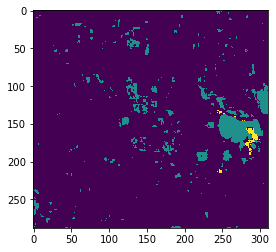

In [106]:
plt.imshow(final_predict)

In [125]:
def write_tiff(tiff_location,patch_n,final_predict,rst,name_to_write):
    path_loc=tiff_location /f'{name_to_write}_{patch_n}.tiff'
    final_tiff = rasterio.open(
        path_loc,
        'w',
        driver=rst.driver,
        height=final_predict.shape[0],
        width=final_predict.shape[1],
        count=1,
        dtype=final_predict.dtype,
        crs=d.crs,
        transform=rst.transform,
    )
    final_tiff.write(final_predict,1)
    final_tiff.close()
    return [path_loc]



def predict_final_mode(path_EOPatch,patch_n):
    tiff_location=path_EOPatch.parent / f"predicted_tiff"
    list_tiff_predicted=glob.glob(tiff_location /f'prediction-eopatch_{patch_n}*')
    all_pred=[]
    for file in list_tiff_predicted:

        rst=rasterio.open(file)
        all_pred.append(rst.read(1))

    final_predict=mode(all_pred)[0][0,:,:]
    path_predict_final=write_tiff(tiff_location,patch_n,final_predict,rst,'final_predict')
    
    return path_predict_final
    

In [122]:
from pathlib import Path
path_EOPatch=path
tiff_location=path_EOPatch.parent / f"predicted_tiff"
list_tiff_predicted=list(tiff_location.glob('prediction-eopatch_{patch_n}*'))

In [126]:
def ts(x,y,z):
    return x+y+z

In [129]:
ts(*[1,2,3])

6